<a href="https://colab.research.google.com/github/bridgeforth6/Data-Analysis/blob/master/Copy_of_BridgeMultiple_model_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Numerai

In [ ]:
# Install dependencies
!pip install -q numerapi pandas matplotlib lightgbm cloudpickle pyarrow catboost
# Install dependencies

# Inline plots
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00


## 1. Dataset  

Let's see what files are available in the API

In [ ]:
# NumerAPI is the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()

# v4.1 is the latest version of the dataset
[f for f in napi.list_datasets() if f.startswith("v4.1")]

['v4.1/features.json',
 'v4.1/live.parquet',
 'v4.1/live_example_preds.csv',
 'v4.1/live_example_preds.parquet',
 'v4.1/live_int8.parquet',
 'v4.1/meta_model.parquet',
 'v4.1/train.parquet',
 'v4.1/train_int8.parquet',
 'v4.1/validation.parquet',
 'v4.1/validation_example_preds.csv',
 'v4.1/validation_example_preds.parquet',
 'v4.1/validation_int8.parquet']

Let's start by downloading `train.parquet` - the historical training data.

In [ ]:
import pandas as pd
import json

# Download the training data and feature metadata
# This will take about 1 minute 🍵
napi.download_dataset("v4.1/train.parquet");
napi.download_dataset("v4.1/features.json");

# In this notebook, we will be using the "small" feature set to save time and memory
# In practice, you will likely want to use all the features to maximize your model's performance
feature_metadata = json.load(open("v4.1/features.json"))
# feature_cols = feature_metadata["feature_sets"]["small"]
feature_cols = [
'feature_bijou_penetrant_syringa',
 'feature_burning_phrygian_axinomancy',
 'feature_coraciiform_sciurine_reef',
 'feature_corporatist_seborrheic_hopi',
 'feature_cyclopedic_maestoso_daguerreotypist',
 'feature_distressed_bloated_disquietude',
 'feature_ecstatic_foundational_crinoidea',
 'feature_elaborate_intimate_bor',
 'feature_entopic_interpreted_subsidiary',
 'feature_esculent_erotic_epoxy',
 'feature_fearsome_merry_bluewing',
 'feature_fribble_gusseted_stickjaw',
 'feature_froggier_unlearned_underworkman',
 'feature_godliest_consistorian_woodpecker',
 'feature_guardian_frore_rolling',
 'feature_iffy_pretty_gumming',
 'feature_just_flavescent_draff',
 'feature_mancunian_stalky_charmeuse',
 'feature_massive_demisable_spouse',
 'feature_piping_geotactic_cusp',
 'feature_septuple_bonapartean_sanbenito',
 'feature_sodding_choosy_eruption',
 'feature_subfusc_furriest_nervule',
 'feature_tragical_rainbowy_seafarer',
 'feature_ugrian_schizocarpic_skulk',
 'feature_undisguised_unenviable_stamen',
 'feature_undrilled_wheezier_countermand',
 'feature_unpainted_censual_pinacoid',
 'feature_unreproved_cultish_glioma',
 'feature_unsizable_ancestral_collocutor',
 'feature_unswaddled_inenarrable_goody',
 'feature_unventilated_sollar_bason',
  # added to set
  'feature_enzymatic_poorest_advocaat',
  'feature_wetter_unbaffled_loma' ,
  'feature_stelliform_curling_trawler'  ,
  'feature_stoichiometric_unanswerable_leveller',
  'feature_ichthyotic_roofed_yeshiva',
  'feature_plum_anemometrical_guessing',
  'feature_insistent_presageful_deist' ,
  'feature_untidy_withdrawn_bargeman',
               'feature_ironfisted_nonvintage_chlorpromazine' ,
                  'feature_objectivist_adaptive_charr',
                  'feature_endoplasmic_inwrought_percival',
                  'feature_immovable_apiarian_joke',
                  'feature_hotter_cattish_aridity',
                  'feature_testicular_slashed_ventosity',
                  'feature_leaky_overloaded_rhodium',
                  'feature_confusable_pursy_plosion',
                  'feature_incorporating_abominable_daily',
                  'feature_basophil_urdy_matzo',
                  'feature_reduplicative_appalling_metastable',
                  # Added this round
                 #'feature_piping_geotactic_cusp', #'feature_incorporating_abominable_daily' did not work
                 #'feature_denuded_typed_wattmeter','feature_bluff_carbonyl_verbena','feature_simpatico_cadential_pup','feature_meteorological_tushed_ester','feature_falsifiable_performative_maxixe','feature_revitalizing_intersectional_dysthymia','feature_disapproving_behind_dampener',
                #'feature_eighteen_kafka_segno',

                  ]

# Load the training data but only the "small" subset of features
training_data = pd.read_parquet("v4.1/train.parquet", columns= ["era"] + feature_cols + ["target_jerome_v4_20"])
training_data.dropna(axis=0, inplace=True)
# Let's take a look
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)
training_data

v4.1/train.parquet: 1.45GB [01:02, 23.2MB/s]                            
v4.1/features.json: 703kB [00:00, 1.64MB/s]                          


,era,feature_bijou_penetrant_syringa,...,feature_reduplicative_appalling_metastable,target_jerome_v4_20
id,,,,,
n003bba8a98662e4,0001,0.00,...,0.50,0.25
n003bee128c2fcfc,0001,0.50,...,0.50,0.75
n0048ac83aff7194,0001,0.25,...,1.00,0.50
n00691bec80d3e02,0001,0.75,...,0.50,0.50
n00b8720a2fdc4f2,0001,0.00,...,0.75,0.50
...,...,...,...,...,...
nffcc1dbdf2212e6,0574,1.00,...,1.00,0.50
nffd71b7f6a128df,0574,0.75,...,0.75,0.25
nffde3b371d67394,0574,0.75,...,0.50,0.25


In [ ]:
# Download validation data
# This will take about 2 minutes 🍵
napi.download_dataset("v4.1/validation.parquet");





v4.1/validation.parquet: 1.59GB [01:13, 21.6MB/s]                            


In [ ]:
# Load the validation data but only the "small" subset of features
validation_data = pd.read_parquet("v4.1/validation.parquet", columns=["era", "data_type"] + feature_cols + ["target_jerome_v4_20"])

# Filter for data_type == "validation"
validation_data = validation_data[validation_data["data_type"] == "validation"]
del validation_data["data_type"]

In [ ]:
# Load the training data but only the "small" subset of features

validation_data = validation_data[validation_data["era"]!="X"]
validation_data.dropna(axis=0, inplace=True)

# Let's take a look
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)
validation_data

,era,feature_bijou_penetrant_syringa,...,feature_reduplicative_appalling_metastable,target_jerome_v4_20
id,,,,,
n000101811a8a843,0575,0.25,...,0.50,0.50
n001e1318d5072ac,0575,0.50,...,1.00,0.00
n002a9c5ab785cbb,0575,0.25,...,1.00,0.50
n002ccf6d0e8c5ad,0575,0.25,...,0.50,0.25
n0051ab821295c29,0575,1.00,...,0.50,0.50
...,...,...,...,...,...
nffdf84066bf469b,1064,0.50,...,0.25,0.25
nfff12e64e9a6fb6,1064,0.75,...,0.25,0.50
nfff134941c033f8,1064,0.75,...,0.75,0.50


Each row in the dataset corresponds to a stock at a specific point in time, represented by the `era` column.

For each `era`, the number of rows is the same as the number of stocks in Numerai's investable universe at that point in time.

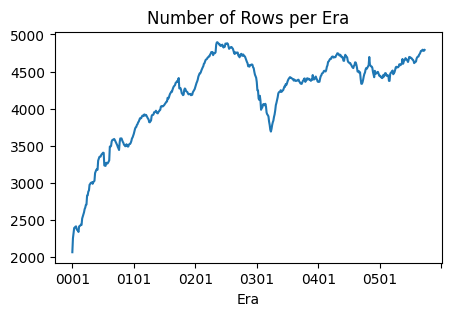

In [ ]:
# Plot the number of rows per era
training_data.groupby("era").size().plot(title="Number of Rows per Era", figsize=(5, 3), xlabel="Era");

The `features` are quantitative attributes (e.g P/E ratio) known about the stocks at the point in time.

Feature values are regularized into 5 equal bins between 0 and 1 per era. This heavy regularization is to avoid overfitting as the underlying financial data is extremely noisy.

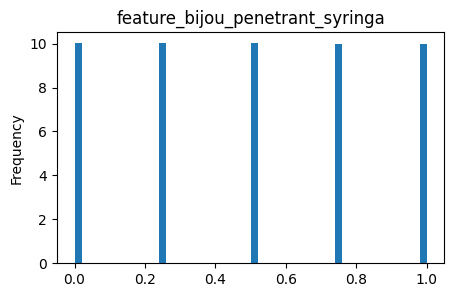

In [ ]:
# Plot density histogram of the first feature
training_data[feature_cols[0]].plot(kind="hist", title=feature_cols[0], figsize=(5, 3), xlabel="Value", density=True, bins=50);

The `target` is a measure of stock market returns 20 days into the future. Your task is to predict this value given out of sample features.

The target value has also been regularized but into 5 unequal bins. The distribution of target values map to the distribution of returns across the stock market.

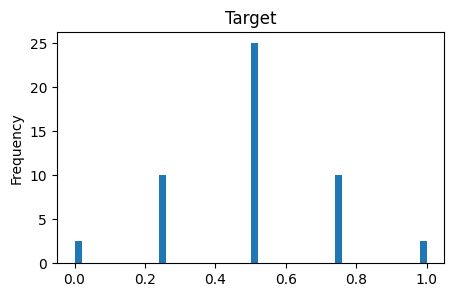

In [ ]:
# Plot density histogram of the target
training_data["target_jerome_v4_20"].plot(kind="hist", title="Target", figsize=(5, 3), xlabel="Value", density=True, bins=50);

## 2. Modeling
Let's train our first model.

Here we will be using LGBM but you are free to use any tool or framework of your choice.

In [ ]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
#import lightgbm as lgb
import os
import logging
import joblib
import numerapi
import pandas as pd
import numpy as np
import json
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

# 200 400

model = CatBoostRegressor(learning_rate=0.1, depth=6, num_boost_round = 600,
                          rsm=0.8,
                          # od_pval = 0.01, task_type = 'GPU',
                          random_seed=89, has_time=True,

random_strength=2, verbose = True)

if os.path.isfile("small_lgb.model"):
    print("Loading pre-trained model...")
    model.load_model("small_lgb.model")
else:
    print("Training model...")
    model.fit(
    training_data[feature_cols],
    training_data["target_jerome_v4_20"],
   # eval_set=(validation_data[feature_cols], validation_data["target"])

  );
  # Save model to disk # model.save_model
  # model.booster_.save_model("small_lgb.model");
    model.save_model("small_lgb.model");


Training model...
0:	learn: 0.2235305	total: 938ms	remaining: 9m 21s
1:	learn: 0.2235132	total: 1.69s	remaining: 8m 23s
2:	learn: 0.2234959	total: 2.5s	remaining: 8m 18s
3:	learn: 0.2234786	total: 3.29s	remaining: 8m 10s
4:	learn: 0.2234658	total: 4.04s	remaining: 8m 1s
5:	learn: 0.2234528	total: 4.84s	remaining: 7m 58s
6:	learn: 0.2234421	total: 5.61s	remaining: 7m 55s
7:	learn: 0.2234336	total: 6.31s	remaining: 7m 46s
8:	learn: 0.2234234	total: 7.05s	remaining: 7m 43s
9:	learn: 0.2234145	total: 7.83s	remaining: 7m 42s
10:	learn: 0.2234026	total: 9.15s	remaining: 8m 9s
11:	learn: 0.2233926	total: 10.6s	remaining: 8m 39s
12:	learn: 0.2233842	total: 11.4s	remaining: 8m 36s
13:	learn: 0.2233770	total: 12.2s	remaining: 8m 29s
14:	learn: 0.2233709	total: 13s	remaining: 8m 26s
15:	learn: 0.2233640	total: 13.8s	remaining: 8m 23s
16:	learn: 0.2233584	total: 14.5s	remaining: 8m 17s
17:	learn: 0.2233512	total: 15.2s	remaining: 8m 12s
18:	learn: 0.2233430	total: 16s	remaining: 8m 9s
19:	learn: 0

Now let's evaluate our model's performance on the out of sample validation dataset

In [ ]:
# Generate predictions against the out of sample validation features
# This will take about 2 minutes 🍵
validation_data["prediction"] = model.predict(validation_data[feature_cols])
validation_data[["era", "prediction", "target_jerome_v4_20"]]

,era,prediction,target_jerome_v4_20
id,,,
n000101811a8a843,0575,0.481895,0.50
n001e1318d5072ac,0575,0.495114,0.00
n002a9c5ab785cbb,0575,0.507513,0.50
n002ccf6d0e8c5ad,0575,0.521203,0.25
n0051ab821295c29,0575,0.481431,0.50
...,...,...,...
nffdf84066bf469b,1064,0.491448,0.25
nfff12e64e9a6fb6,1064,0.487330,0.50
nfff134941c033f8,1064,0.465085,0.50


In [ ]:
from scipy import stats
import numpy as np

# Numerai's primary scoring metric
def numerai_corr(preds, target):
    # rank (keeping ties) then gaussianize predictions to standardize prediction distributions
    ranked_preds = (preds.rank(method="average").values - 0.5) / preds.count()
    gauss_ranked_preds = stats.norm.ppf(ranked_preds)
    # center targets around 0
    centered_target = target - target.mean()
    # raise both preds and target to the power of 1.5 to accentuate the tails
    preds_p15 = np.sign(gauss_ranked_preds) * np.abs(gauss_ranked_preds) ** 1.5
    target_p15 = np.sign(centered_target) * np.abs(centered_target) ** 1.5
    # finally return the Pearson correlation
    return np.corrcoef(preds_p15, target_p15)[0, 1]

In [ ]:
# Compute the per-era correlation of each feature to the targete
per_era_corrs = pd.DataFrame(index=training_data.era.unique())
for feature_name in feature_cols:
    per_era_corrs[feature_name] = training_data.groupby("era").apply(lambda d: numerai_corr(d[feature_name], d["target_jerome_v4_20"]))

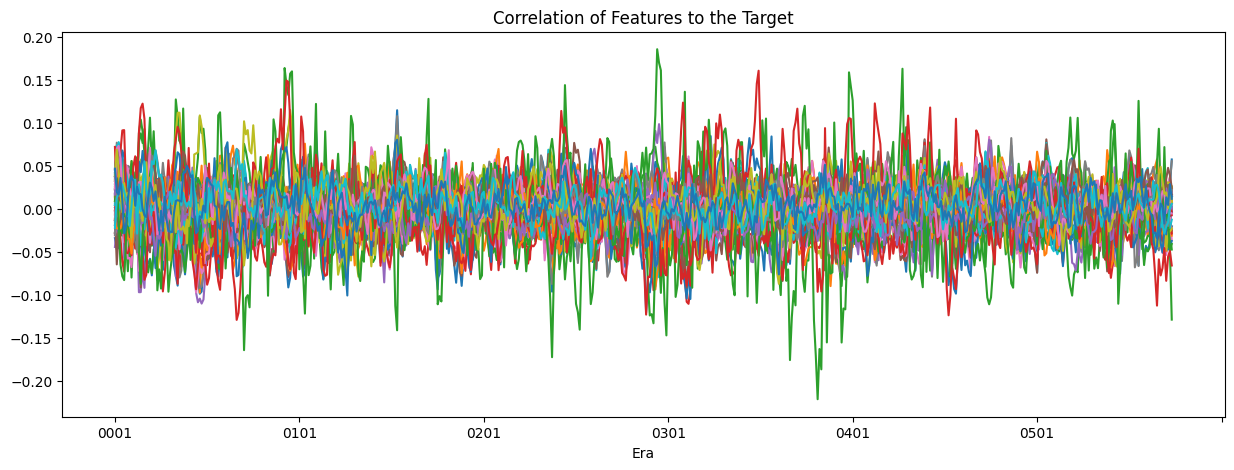

In [ ]:
# Plot the per-era correlations of the features
per_era_corrs.plot(figsize=(15, 5), title="Correlation of Features to the Target", legend=False, xlabel="Era");

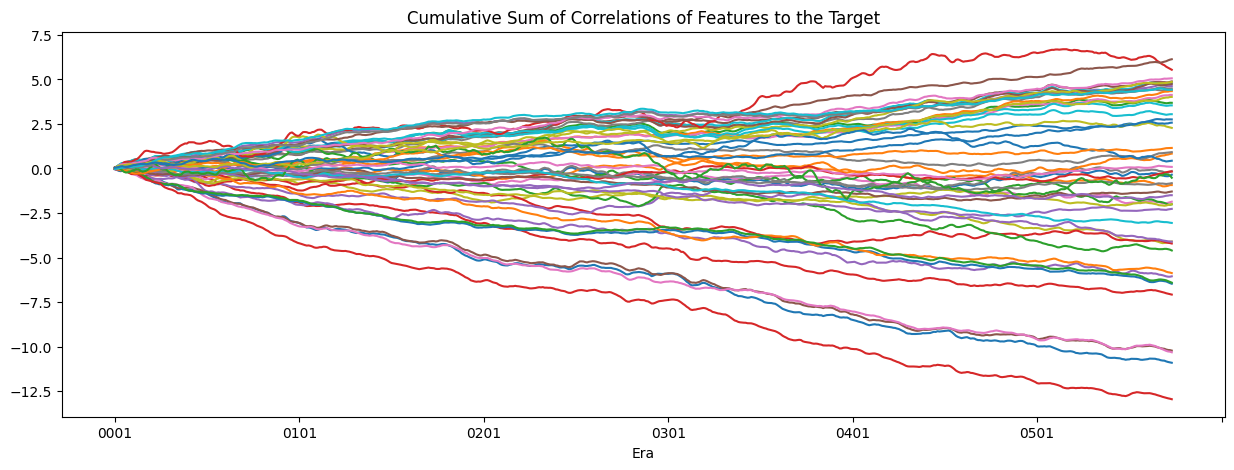

In [ ]:
# Plot the cumulative sum of the per-era correlations of the features
per_era_corrs.cumsum().plot(figsize=(15, 5), title="Cumulative Sum of Correlations of Features to the Target", legend=False, xlabel="Era");

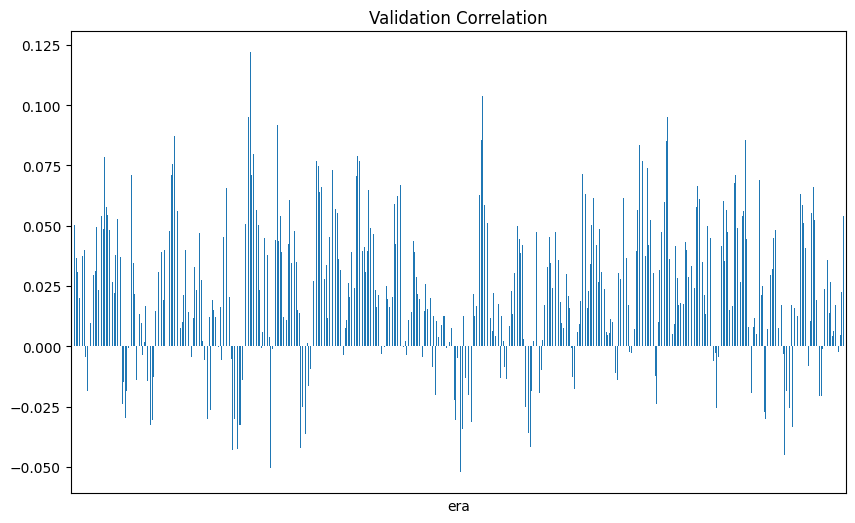

In [ ]:
# Compute the per-era correlation between our predictions and the target values
per_era_corr = validation_data.groupby("era").apply(lambda x: numerai_corr(x["prediction"], x["target_jerome_v4_20"]))

# Plot the per-era correlation
per_era_corr.plot(kind="bar", title="Validation Correlation", figsize=(10, 6), xticks=[]);

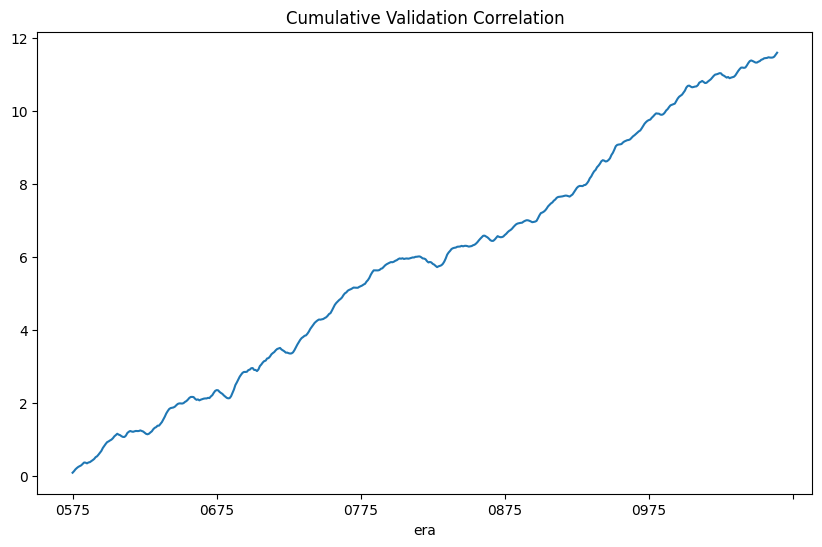

In [ ]:
# Plot the cumulative per-era correlation
per_era_corr.cumsum().plot(kind="line", title="Cumulative Validation Correlation", figsize=(10, 6));

In [ ]:
def metrics(per_era_corr):
    corr_mean = per_era_corr.mean()
    corr_std = per_era_corr.std(ddof=0)
    corr_sharpe = corr_mean / corr_std
    max_drawdown = -(per_era_corr.cumsum().expanding(min_periods=1).max() - per_era_corr.cumsum()).max()

    eras = training_data.era.unique()
    corr_mean_first_half = per_era_corr.loc[eras[:len(eras)//2]].mean()
    corr_mean_second_half = per_era_corr.loc[eras[len(eras)//2:]].mean()
    delta = abs(corr_mean_first_half - corr_mean_second_half)

    return { "mean": corr_mean, "std": corr_std, "sharpe": corr_sharpe, "max_drawdown": max_drawdown, "delta": delta }

# compute performance metrics for each feature
feature_metrics = pd.DataFrame(index=feature_cols, columns=["mean", "std", "sharpe", "max_drawdown", "delta"])
for feature_name in feature_cols:
    feature_metrics.loc[feature_name] = metrics(per_era_corrs[feature_name])

# make all cells numeric
feature_metrics = feature_metrics.apply(pd.to_numeric)

feature_metrics.sort_values("mean", ascending=False)

,mean,std,sharpe,max_drawdown,delta
feature_testicular_slashed_ventosity,0.010691,0.018499,0.577926,-0.324119,0.001254
feature_immovable_apiarian_joke,0.009663,0.048484,0.199291,-1.152590,0.002480
feature_leaky_overloaded_rhodium,0.008822,0.020361,0.433301,-0.288538,0.003212
feature_distressed_bloated_disquietude,0.008520,0.022099,0.385526,-0.290366,0.002401
feature_massive_demisable_spouse,0.008471,0.019929,0.425080,-0.223261,0.002329
...,...,...,...,...,...
feature_corporatist_seborrheic_hopi,-0.012337,0.024466,-0.504231,-7.191550,0.004755
feature_undisguised_unenviable_stamen,-0.017816,0.027048,-0.658694,-10.224262,0.003718
feature_undrilled_wheezier_countermand,-0.017983,0.024111,-0.745843,-10.293597,0.006746
feature_fearsome_merry_bluewing,-0.019009,0.029051,-0.654314,-10.877145,0.002690


In [ ]:
# compute performance metrics
corr_mean = per_era_corr.mean()
corr_std = per_era_corr.std(ddof=0)
corr_sharpe = corr_mean / corr_std
max_drawdown = -(per_era_corr.cumsum().expanding(min_periods=1).max() - per_era_corr.cumsum()).max()

pd.DataFrame({
    "Mean": corr_mean,
    "Standard Deviation": corr_std,
    "Sharpe Ratio": corr_sharpe,
    "Max Drawdown": max_drawdown
}, index=["Value"]).T

,Value
Mean,0.023656
Standard Deviation,0.030190
Sharpe Ratio,0.783585
Max Drawdown,-0.291719


In [ ]:
pd.DataFrame({
    "Mean": corr_mean,
    "Standard Deviation": corr_std,
    "Sharpe Ratio": corr_sharpe,
    "Max Drawdown": max_drawdown
}, index=["Value"]).T

,Value
Mean,0.023656
Standard Deviation,0.030190
Sharpe Ratio,0.783585
Max Drawdown,-0.291719


In [ ]:
current_round_number = napi.get_current_round()

`Mean` correlation is the primary measure of your model's performance. An mean correlation above 0.02 is considered good.

`Sharpe` is a measure of your model's consistency, a concept borrowed from finance where it usually refers to risk adjusted returns of an investment strategy. In Numerai, we compute sharpe as the average correlation divided by the standard deviation of correlations. A sharpe above 1 is considered good.

`Max drawdown` is a measure of your model's risk, another concept borrowed from finance where it usually refers to the maximum financial loss suffered by an investment strategy. In Numerai, we compute max drawdown as the maximum peak to trough drop in cumulative validation correlation. A max drawdown below 0.1 in magnitude is considered good.

# 3. Submissions
Unlike Kaggle competitions where models are often evaluated based on their performance on a hold out test set, Numerai evaluates models based on their <ins>live performance</ins> in the real stock market.

Every Tuesday-Saturday, a new live era of features is released, representing the current state of the stock market. Your task is to use the live features to generate live predictions and submit them to Numerai.

In [ ]:
# Check the current round number
current_round_number = napi.get_current_round()

# Download latest live features for the current round number
napi.download_dataset("v4.1/live.parquet", f"v4.1/live_{current_round_number}.parquet")

# Load live features
live_features = pd.read_parquet(f"v4.1/live_{current_round_number}.parquet", columns=feature_cols)

# Generate live predictions with our trained model
live_predictions = model.predict(live_features[feature_cols])

# Format submission
submission = pd.Series(live_predictions, index=live_features.index).to_frame("prediction")
submission

v4.1/live_521.parquet: 4.48MB [00:00, 7.40MB/s]                            


,prediction
id,
n00056fd7afbae2c,0.508905
n000ab9f6d510e3e,0.503247
n00169323a253809,0.491022
n001990868803ed4,0.473203
n001d48f7192fc19,0.509229
...,...
nffce60bb4035bc5,0.461199
nffd53a788e20a23,0.496979
nffdd2e3ab5f4b47,0.510489


The simplest way to automate this daily process is to upload your model to Numerai and let Numerai take care of running it daily to generate live predictions.

You can also host your own model if you prefer, see our [docs](https://docs.numer.ai/numerai-tournament/submissions#automation) for more advanced examples.

In [ ]:
# Wrap your model with a function that takes live features and returns live predictions
def predict(live_features: pd.DataFrame) -> pd.DataFrame:
    live_predictions = model.predict(live_features[feature_cols])
    submission = pd.Series(live_predictions, index=live_features.index)
    return submission.to_frame("prediction")

In [ ]:
# Quick test
predict(live_features)

,prediction
id,
n00056fd7afbae2c,0.508905
n000ab9f6d510e3e,0.503247
n00169323a253809,0.491022
n001990868803ed4,0.473203
n001d48f7192fc19,0.509229
...,...
nffce60bb4035bc5,0.461199
nffd53a788e20a23,0.496979
nffdd2e3ab5f4b47,0.510489


In [ ]:
# Use the cloudpickle library to serialize your function
import cloudpickle
p = cloudpickle.dumps(predict)
with open("predict.pkl", "wb") as f:
    f.write(p)

In [ ]:
# Download file if running in Google Colab
try:
    from google.colab import files
    files.download('predict.pkl')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission.to_csv(f"submission.csv")

In [ ]:
validation_data[[ "prediction"]].to_csv(f"val_submission.csv")

In [ ]:
# compute the peason correlation of the predictions with each feature
feature_exposures = validation_data.groupby("era").apply(lambda d: d[feature_cols].corrwith(d["prediction"]))

feature_exposures

,feature_bijou_penetrant_syringa,feature_burning_phrygian_axinomancy,...,feature_basophil_urdy_matzo,feature_reduplicative_appalling_metastable
era,,,,,
0575,-0.072710,0.011023,...,0.124654,0.057705
0576,-0.059070,0.024734,...,0.130490,0.054270
0577,-0.079526,0.037234,...,0.131446,0.071879
0578,-0.057167,0.055951,...,0.120997,0.071432
0579,-0.050267,0.064834,...,0.120776,0.056701
...,...,...,...,...,...
1060,-0.099934,-0.071095,...,0.094067,0.040513
1061,-0.077169,-0.066538,...,0.100603,0.068870
1062,-0.078658,-0.072151,...,0.101432,0.074311


In [ ]:
import matplotlib.pyplot as plt

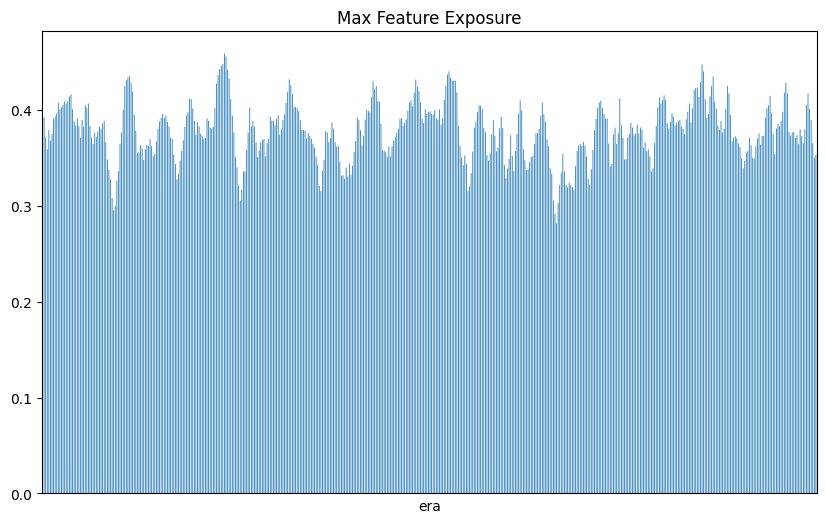

In [ ]:
# plot the feature exposures as bar charts
# Plot the max feature exposure per era
max_feature_expposure_per_era = validation_data.groupby("era").apply(lambda d: d[feature_cols].corrwith(d["prediction"]).abs().max())
max_feature_expposure_per_era.plot(title="Max Feature Exposure", kind="bar", figsize=(10, 6), xticks=[], snap=False);

In [ ]:
# Mean max feature exposure across eras
max_feature_exposure_mean = max_feature_expposure_per_era.mean()
max_feature_exposure_mean

0.37825122182159066

In [ ]:

# Neutralize predictions to features
def neutralize(predictions: pd.DataFrame, features: list[str], proportion: float = 1.0) -> pd.DataFrame:
    # add a constant term the features so we can fit the bias/offset term
    features = np.hstack((features, np.array([np.mean(predictions)] * len(features)).reshape(-1, 1)))
    # remove the parts of the predictions that are linearly correlated with features
    return predictions - proportion * features @ (np.linalg.pinv(features, rcond=1e-6) @ predictions)

In [ ]:
# Neutralize predictions per-era againat all features at different proportions
proportions = [0.25, 0.5, 0.75, 0.90]
for proportion in proportions:
    neutralized = validation_data.groupby("era").apply(lambda d: neutralize(d["prediction"], d[feature_cols], proportion=proportion))
    validation_data[f"neutralized_{proportion*100:.0f}"] = neutralized.reset_index().set_index("id")["prediction"]

# Rename predictions to "neutralized_0"
validation_data.rename(columns={"prediction": "neutralized_0"}, inplace=True)

# Align the neutralized predictions with the validation data
prediction_cols = [f for f in validation_data.columns if "neutralized" in f]
validation_data[["era"] + prediction_cols + ["target_jerome_v4_20"]]

,era,neutralized_0,...,neutralized_90,target_jerome_v4_20
id,,,,,
n000101811a8a843,0575,0.481895,...,0.037066,0.50
n001e1318d5072ac,0575,0.495114,...,0.048368,0.00
n002a9c5ab785cbb,0575,0.507513,...,0.062113,0.50
n002ccf6d0e8c5ad,0575,0.521203,...,0.069582,0.25
n0051ab821295c29,0575,0.481431,...,0.043940,0.50
...,...,...,...,...,...
nffdf84066bf469b,1064,0.491448,...,0.054513,0.25
nfff12e64e9a6fb6,1064,0.487330,...,0.046875,0.50
nfff134941c033f8,1064,0.465085,...,0.021718,0.50


In [ ]:
# Compute max feature exposure for each set of predictions
max_feature_exposures = {}
for col in prediction_cols:
    max_feature_exposures[col] = validation_data.groupby("era").apply(lambda d: d[feature_cols].corrwith(d[col]).abs().max())

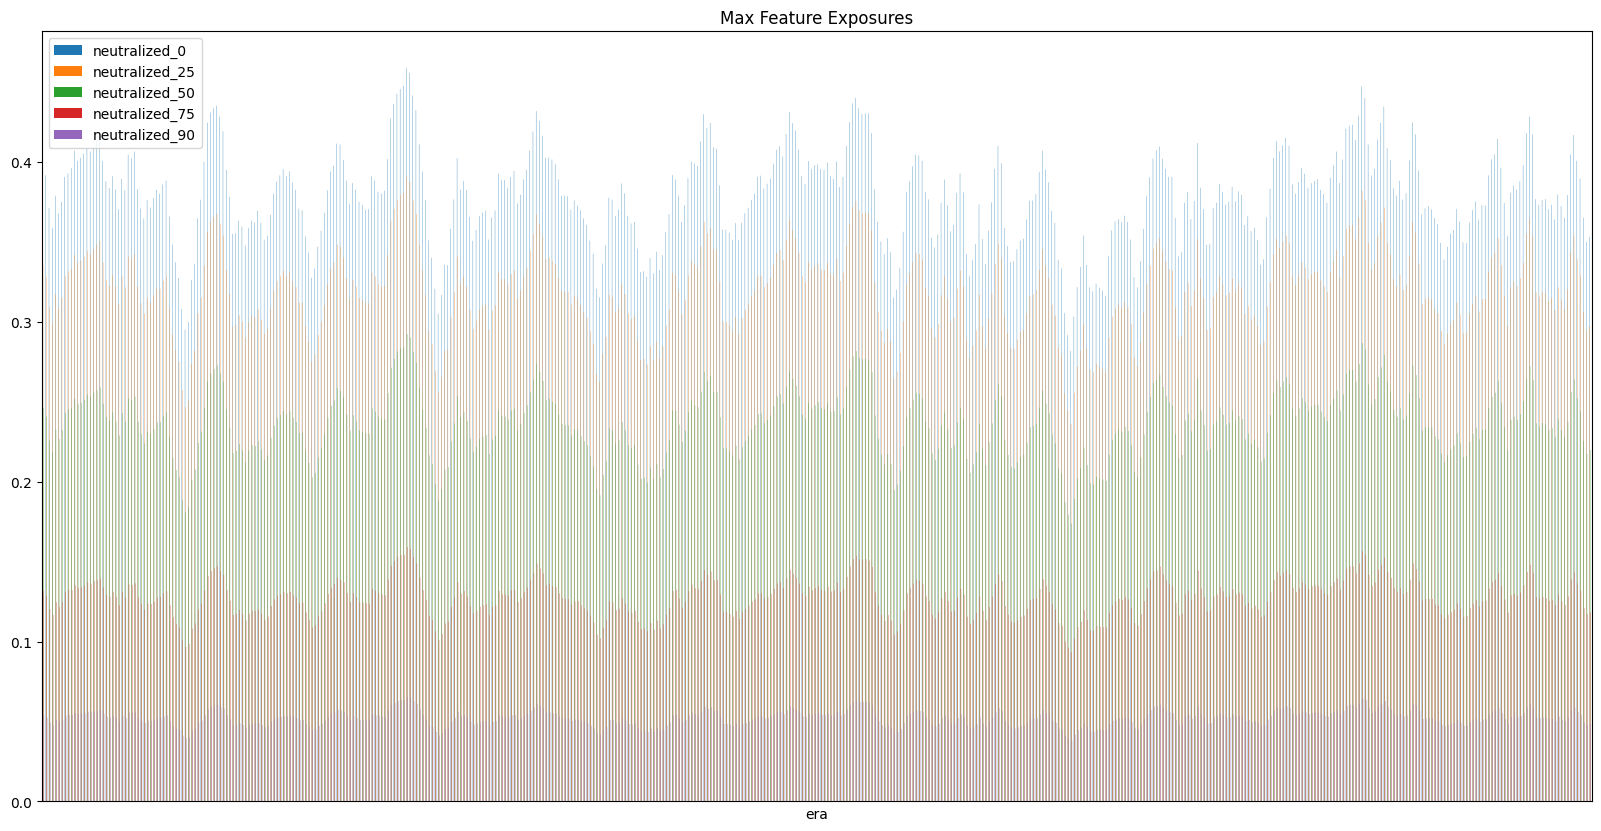

In [ ]:
max_feature_exposures = pd.DataFrame(max_feature_exposures)
# move neutralized_0 to the front
max_feature_exposures = max_feature_exposures[["neutralized_0"] + [c for c in max_feature_exposures.columns if c != "neutralized_0"]]
# plot
max_feature_exposures.plot.bar(figsize=(20, 10), title="Max Feature Exposures", xticks=[], snap=False);

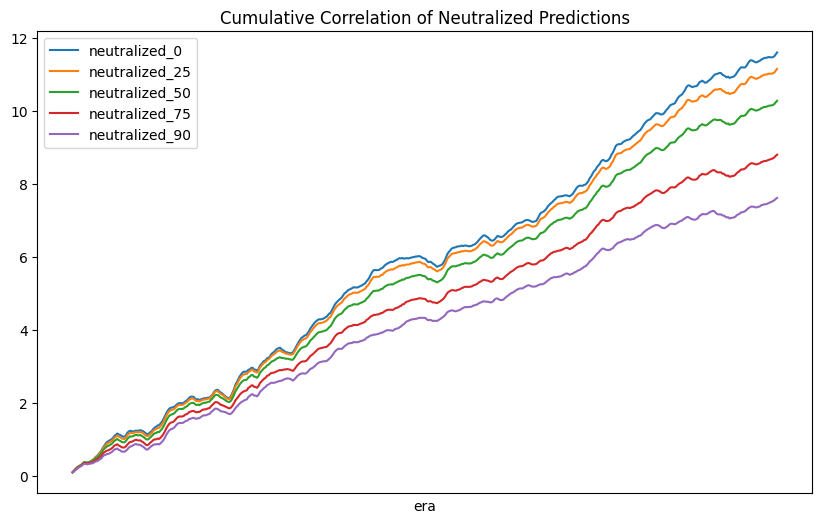

In [ ]:
# Plot cumulative correlations
correlations = {}
cumulative_correlations = {}
for col in prediction_cols:
    correlations[col] = validation_data.groupby("era").apply(lambda d: numerai_corr(d[col], d["target_jerome_v4_20"]))
    cumulative_correlations[col] = correlations[col].cumsum()

pd.DataFrame(cumulative_correlations).plot(title="Cumulative Correlation of Neutralized Predictions", figsize=(10, 6), xticks=[]);

In [ ]:
summary_metrics = {}
for col in prediction_cols:
    mean = correlations[col].mean()
    std = correlations[col].std()
    sharpe = mean / std
    rolling_max = cumulative_correlations[col].expanding(min_periods=1).max()
    max_drawdown = (rolling_max - cumulative_correlations[col]).max()
    max_feature_exposure_mean = max_feature_exposures[col].mean()
    summary_metrics[col] = {
        "mean": mean,
        "std": std,
        "sharpe": sharpe,
        "max_drawdown": max_drawdown,
        "max_feature_exposure_mean": max_feature_exposure_mean
    }

pd.DataFrame(summary_metrics).T

,mean,std,sharpe,max_drawdown,max_feature_exposure_mean
neutralized_0,0.023656,0.030220,0.782785,0.291719,0.378251
neutralized_25,0.022738,0.028396,0.800732,0.259419,0.319278
neutralized_50,0.020954,0.025698,0.815396,0.208022,0.236605
neutralized_75,0.017942,0.022483,0.798046,0.186886,0.127688
neutralized_90,0.015524,0.020702,0.749859,0.205809,0.052298


In [ ]:
def predict_neutral(live_features: pd.DataFrame) -> pd.DataFrame:
    predictions = pd.Series(model.predict(live_features[feature_cols]), index=live_features.index)
    # neutralize to features by 50%
    neutralized = neutralize(predictions, live_features[feature_cols], 0.50)
    submission = pd.Series(neutralized).rank(pct=True, method="first")
    return submission.to_frame("prediction")

# Use the cloudpickle library to serialize your function and its dependencies
import cloudpickle
p = cloudpickle.dumps(predict_neutral)
with open("predict_neutral.pkl", "wb") as f:
    f.write(p)

In [ ]:
# Quick test
current_round_number = napi.get_current_round()
napi.download_dataset("v4.1/live.parquet", f"v4.1/live_{current_round_number}.parquet")
live_features = pd.read_parquet(f"v4.1/live_{current_round_number}.parquet", columns=feature_cols)
predict_neutral(live_features)

,prediction
id,
n00056fd7afbae2c,0.608089
n000ab9f6d510e3e,0.637007
n00169323a253809,0.169060
n001990868803ed4,0.032154
n001d48f7192fc19,0.722346
...,...
nffce60bb4035bc5,0.015571
nffd53a788e20a23,0.583215
nffdd2e3ab5f4b47,0.794338


In [ ]:
# Download file if running in Google Colab
try:
    from google.colab import files
    files.download('predict_neutral.pkl')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predict_neutral(validation_data).to_csv(f"val_neutral_submission.csv")

That's it! Now head back to [numer.ai](https://numer.ai/home) to upload your model!